In [1]:
from google.colab import files


uploaded = files.upload()

Saving indexed-dataFrame.csv to indexed-dataFrame (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("indexed-dataFrame.csv")

In [4]:
df.shape

(16248, 26)

In [5]:
df.head()

,Time,fuelConsumption,HFO,MGO,draftForward,draftAft,draftMid1,draftMid2,shaftSpeed,shaftTorque,...,AWD,TWS,TWD,temp,currentDirection,currentSpeed,waterDepth,waveHeight,wavePeriod,waveDirection
0,7/6/2017 13:15,0.0,0.0,0.0,0.0,0.0,0.0,11.497695,84.878837,1013.631639,...,20.425315,6.675341,314.224434,20.283071,254.033533,0.070896,0.0,0.0,0.0,0.0
1,7/6/2017 14:00,0.0,0.0,0.0,0.0,0.0,0.0,11.509352,84.868300,1004.244559,...,23.426522,7.034934,308.615477,20.360865,323.890575,0.006596,0.0,0.0,0.0,0.0
2,7/6/2017 15:00,0.0,0.0,0.0,0.0,0.0,0.0,11.531678,84.874972,1003.751648,...,22.396432,7.778714,303.563221,20.534437,22.703059,0.027087,0.0,0.0,0.0,0.0
3,7/6/2017 16:00,0.0,0.0,0.0,0.0,0.0,0.0,11.545624,84.867446,1010.716545,...,8.588757,8.508143,300.737464,20.641539,347.948256,0.034555,0.0,0.0,0.0,0.0
4,7/6/2017 17:00,0.0,0.0,0.0,0.0,0.0,0.0,11.549795,84.864535,1013.179696,...,-15.548513,8.541664,302.903406,20.662176,217.495117,0.029501,0.0,0.0,0.0,0.0


In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.shape

(16084, 26)

In [8]:
df.loc[df['fuelConsumption'] < 0, 'fuelConsumption'] = 0

In [9]:
df.describe()

,fuelConsumption,HFO,MGO,draftForward,draftAft,draftMid1,draftMid2,shaftSpeed,shaftTorque,shaftPower,...,AWD,TWS,TWD,temp,currentDirection,currentSpeed,waterDepth,waveHeight,wavePeriod,waveDirection
count,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,...,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000,16084.000000
mean,19.058369,0.816453,0.174122,8.052759,9.525446,8.787465,8.887000,50.945466,576.667389,4723.296006,...,5.236372,11.934411,188.118918,20.734993,113.761780,0.252522,20.401421,0.322909,1.278421,35.918050
std,18.079027,0.386674,0.378717,2.647697,1.916507,2.245224,2.106666,36.676121,444.506708,4034.575949,...,115.192859,6.385196,113.072684,13.686842,115.783118,0.392770,46.505555,0.800930,2.766904,85.540203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.681231,-7.110332,-0.001360,0.000000,...,-358.561592,0.000000,0.000568,-273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,5.781865,7.949879,6.832538,6.854081,0.000000,7.391908,6.951682,...,-38.361184,7.261137,79.045431,16.450906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.922000,1.000000,0.000000,7.272816,8.912127,8.144795,8.295948,69.725568,711.700832,5064.560811,...,-0.553648,11.268358,199.607859,22.682902,80.604680,0.119916,0.000000,0.000000,0.000000,0.000000
75%,39.785383,1.000000,0.000000,10.929954,11.550248,11.264735,11.311137,85.457932,1025.672592,9154.355837,...,37.399218,15.814307,292.351547,26.866839,209.365727,0.326772,13.939457,0.000000,0.000000,0.000000
max,49.090823,1.000000,1.000000,13.136587,12.589208,12.132386,12.127948,88.959431,1206.091541,11150.041980,...,416.129827,40.845838,359.997076,52.559168,359.999715,3.184603,326.803229,6.323284,13.873590,357.472397


In [10]:
df2=df.iloc[:,0:2]

In [11]:
df3=df2.groupby(["Time"],as_index=False).fuelConsumption.sum()
df4=pd.DataFrame(df3)

In [12]:
df4['months'] = pd.DatetimeIndex(df2['Time']).to_period('M')
df4

,Time,fuelConsumption,months
0,1/1/2018 0:00,0.0,2017-07
1,1/1/2018 10:00,0.0,2017-07
2,1/1/2018 11:00,0.0,2017-07
3,1/1/2018 12:00,0.0,2017-07
4,1/1/2018 13:00,0.0,2017-07
...,...,...,...
16079,9/9/2018 5:00,0.0,2019-05
16080,9/9/2018 6:00,0.0,2019-05
16081,9/9/2018 7:00,0.0,2019-05
16082,9/9/2018 8:00,0.0,2019-05


In [13]:
df4.drop(["Time"],axis=1,inplace=True)

In [14]:
df4=df4.groupby(["months"],as_index=False).fuelConsumption.sum()
df4=pd.DataFrame(df4)

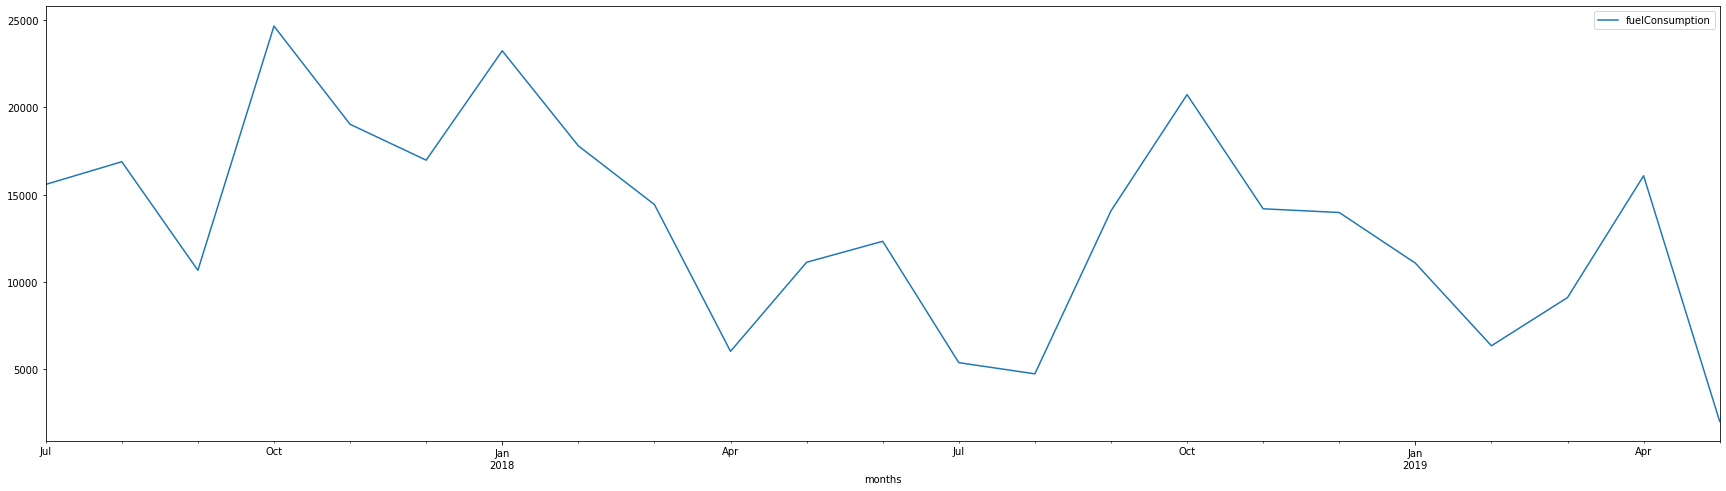

In [15]:
df4.plot("months","fuelConsumption",figsize=(30,8))

In [16]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df4.fuelConsumption.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.436923
p-value: 0.903749


In [17]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(df4["fuelConsumption"])

ADF Test Statistic : -0.43692305969235756
p-value : 0.903749029592527
#Lags Used : 9
Number of Observations Used : 13
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


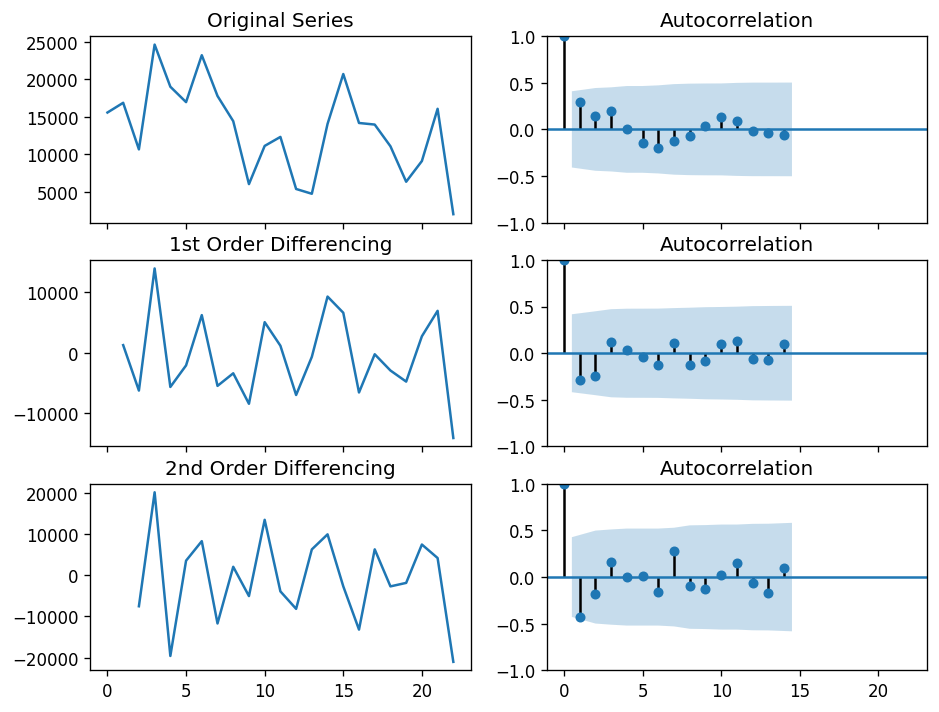

In [19]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df4.fuelConsumption); axes[0, 0].set_title('Original Series')
plot_acf(df4.fuelConsumption, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df4.fuelConsumption.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df4.fuelConsumption.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df4.fuelConsumption.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df4.fuelConsumption.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [20]:

import statsmodels.api as sm

In [22]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from pmdarima.arima.utils import ndiffs
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df4.fuelConsumption

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df4["fuelConsumption"], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        fuelConsumption   No. Observations:                   23
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -221.059
Date:                Sat, 20 Aug 2022   AIC                            450.118
Time:                        04:38:23   BIC                            454.482
Sample:                             0   HQIC                           451.146
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3891      0.315     -1.236      0.217      -1.006       0.228
ma.L1          0.1783      0.398      0.448      0.654      -0.601       0.958
ma.L2         -0.8210      0.326     -2.518      0.0

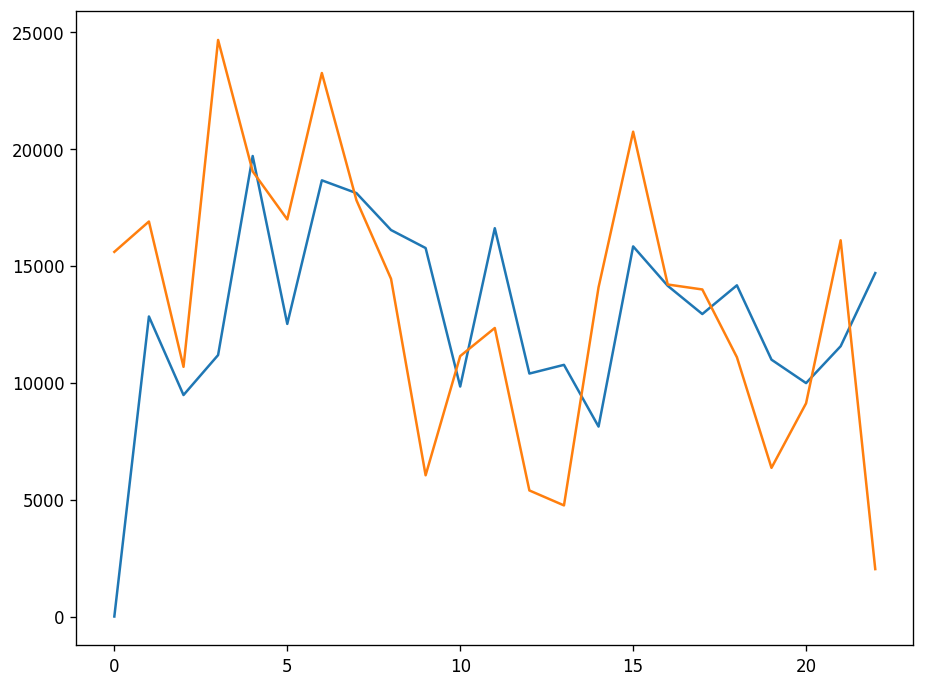

In [29]:
#model_fit.plot_predict(dynamic=False)
#plt.show()
predict=model_fit.predict(typ='levels')
plt.plot(predict)
plt.plot(df4["fuelConsumption"])

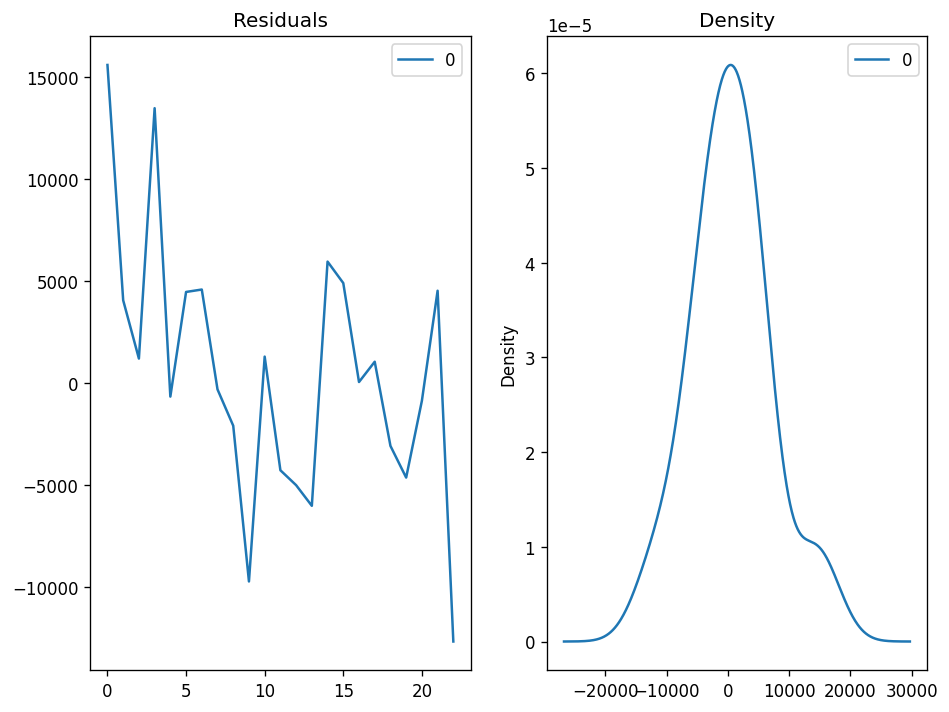

In [30]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [31]:
train=df4.iloc[:85]
#uptil last 50 is the training dataset
test=df4.iloc[85:98]

In [50]:
x=model_fit.forecast(10)

In [51]:
y=pd.DataFrame(x)
y

,predicted_mean
23,2147.736462
24,12096.484452
25,8225.284420
26,9731.623680
27,9145.485545
28,9373.560271
29,9284.813135
30,9319.345914
31,9305.908716
32,9311.137322


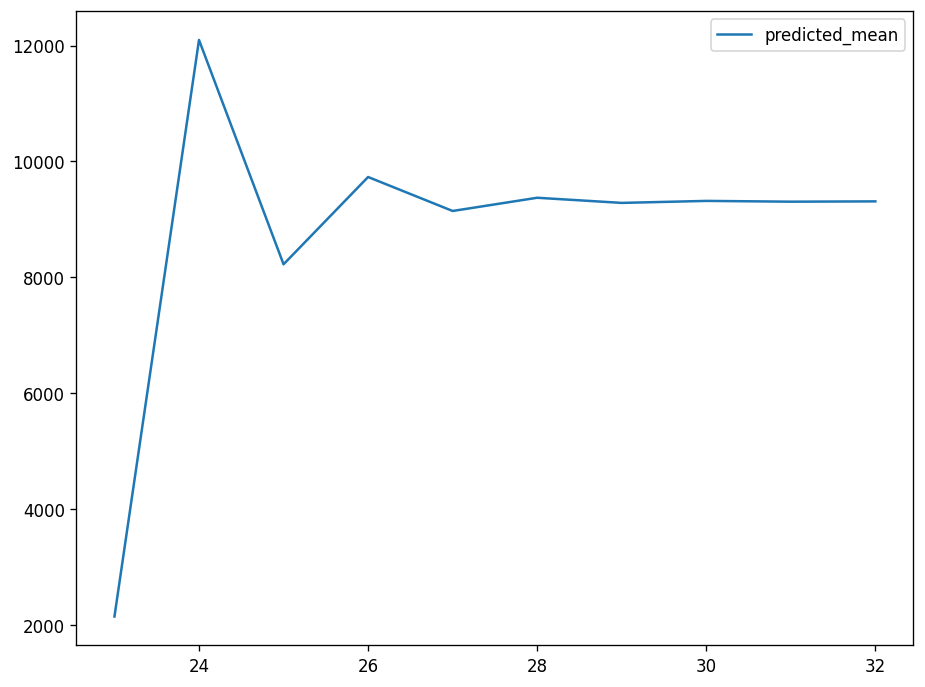

In [52]:
y.plot()

In [53]:
import pickle


In [54]:
filename = 'forecasting.sav'
pickle.dump(model, open(filename, 'wb'))

In [55]:
loaded_model = pickle.load(open('forecasting.sav', 'rb'))